# Classification
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

sb.set() # set the default Seaborn style for graphics

## Import Preprocessed Data from the Data Processing step earlier.
Note: The preprocessed data are one-hot encoded for categorical variables and scaled for numerical variables (from Data Pre-Processing.ipynb)

In [2]:
# Read columns used to build models
columns = pd.read_csv('Data/basic_model_columns.csv')['Columns'].to_list()

In [4]:
X_train = pd.read_csv('Data/X_train.csv')[columns]
X_test = pd.read_csv('Data/X_test.csv')[columns]
Y_train = pd.read_csv('Data/y_train.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (28062, 1) (28062, 39)
Test Set  : (8176, 1) (8176, 39)


## Attempt 1 - Try to run basic classification models against current preprocessed dataset without any additional tuning (i.e. hyper parameter tuning, feature selection and etc). 


In [56]:
# Import all essential functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Set up a dataframe to store the results from different models
train_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### Logistic Regression Classification Model

In [57]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression(max_iter=10000).fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = logRegModel.predict(X_train)
Y_test_pred = logRegModel.predict(X_test)

#### Plot Confusion Matrix for Logistic Regression Model

Train and Test Data Confusion Matrix:


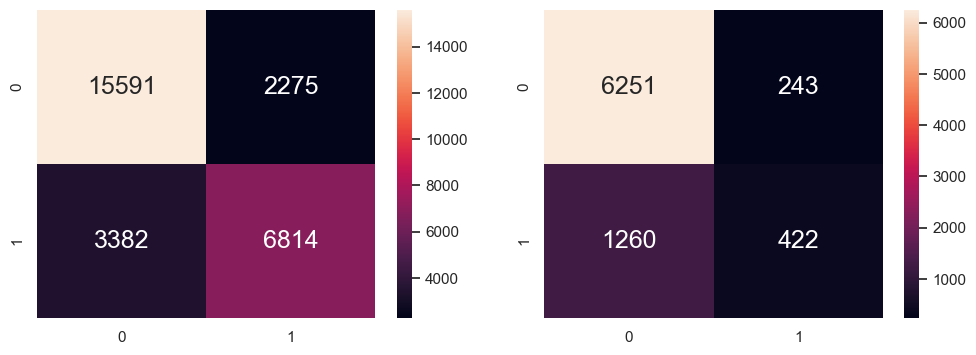

In [58]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Logistic Regression Model

In [59]:
train_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.7984106621053382
Precision 	: 0.749697436461657
Recall 		: 0.6683012946253433
F1 Score 	: 0.7066632097485093

**Test Set Metrics**
Accuracy 	: 0.8161692759295499
Precision 	: 0.6345864661654136
Recall 		: 0.25089179548156954
F1 Score 	: 0.3596080102258202


### Decision Tree Classification Model

In [60]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [61]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(X_train, Y_train)

# Predict the output based on our training and testing dataset
Y_train_pred = decisionTreeModel.predict(X_train)
Y_test_pred = decisionTreeModel.predict(X_test)

#### Plot Confusion Matrix for Decision Tree Model

Train and Test Data Confusion Matrix:


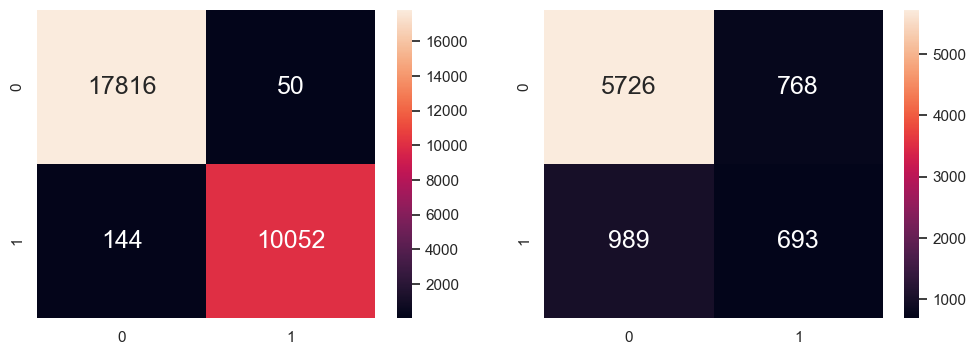

In [62]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Decision Tree Model

In [63]:
train_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.9930867365120091
Precision 	: 0.9950504850524649
Recall 		: 0.9858768144370341
F1 Score 	: 0.9904424081190266

**Test Set Metrics**
Accuracy 	: 0.7851027397260274
Precision 	: 0.47433264887063653
Recall 		: 0.41200951248513673
F1 Score 	: 0.44097995545657015


### K-Nearest Neighbour Classification Model

In [64]:
# Import k nearest neighbour classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Default k nearest neighbour is n_neighbours = 5 (this can be further tuned in the future)
kNeighboursModel = KNeighborsClassifier()
kNeighboursModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = kNeighboursModel.predict(X_train)
Y_test_pred = kNeighboursModel.predict(X_test)

#### Plot Confusion Matrix for K-Nearest Neighbour Model

Train and Test Data Confusion Matrix:


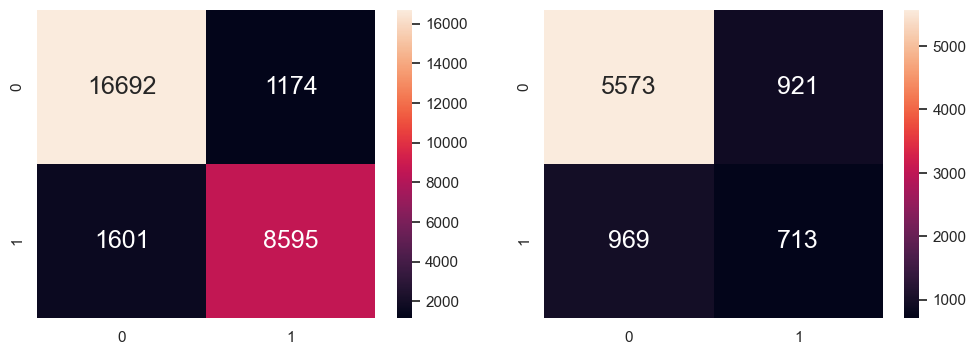

In [65]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for K-Nearest Neighbour Model

In [66]:
train_metric = {
    "Classification Model": "K-nearest Neighbour",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "K-nearest Neighbour",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.9011118238186872
Precision 	: 0.8798239328488074
Recall 		: 0.8429776382895253
F1 Score 	: 0.8610067618332081

**Test Set Metrics**
Accuracy 	: 0.7688356164383562
Precision 	: 0.4363525091799266
Recall 		: 0.4239001189060642
F1 Score 	: 0.43003618817852834


### Linear Support Vector Machine (SVM) Classification Model

In [67]:
# Import SVM from Sklearn
from sklearn.svm import SVC

svmModel = SVC(kernel="linear")
svmModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = svmModel.predict(X_train)
Y_test_pred = svmModel.predict(X_test)

#### Plot Confusion Matrix for Linear Support Vector Machine (SVM) Model

Train and Test Data Confusion Matrix:


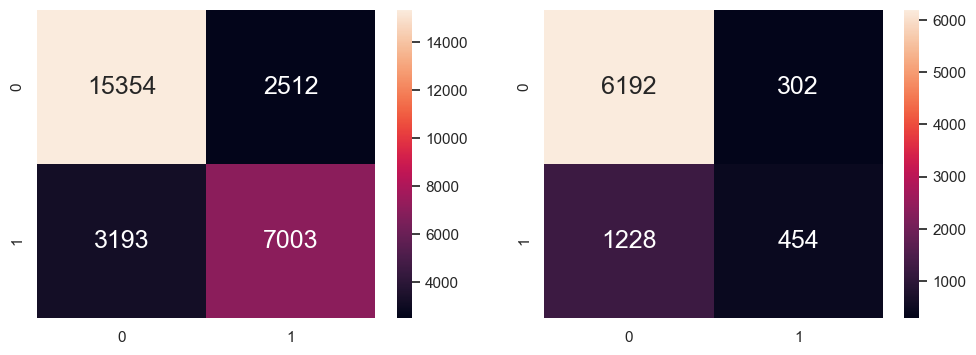

In [68]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Linear Support Vector Machine (SVM) Model

In [69]:
train_metric = {
    "Classification Model": "Support Vector Machine",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Support Vector Machine",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.7967001639227425
Precision 	: 0.7359957961114031
Recall 		: 0.686837975676736
F1 Score 	: 0.710567703312871

**Test Set Metrics**
Accuracy 	: 0.812866927592955
Precision 	: 0.6005291005291006
Recall 		: 0.2699167657550535
F1 Score 	: 0.3724364232977851


### Naive Bayes (Gaussian) Classification Model

Given the nature of our dataset which consist of mixed data types such as numerical features and one hot encoded values, there is no one best fit naive bayes model (Guassian, Bernoulli, Multinomial), but let's try GaussianNB given the scaled numerical features we have.

In [70]:
# Import Gaussian Naive Bayes Classifier from Sklearn
from sklearn.naive_bayes import GaussianNB

gaussianNBModel = GaussianNB()
gaussianNBModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = gaussianNBModel.predict(X_train)
Y_test_pred = gaussianNBModel.predict(X_test)

#### Plot Confusion Matrix for Naive Bayes (Gaussian) Model

Train and Test Data Confusion Matrix:


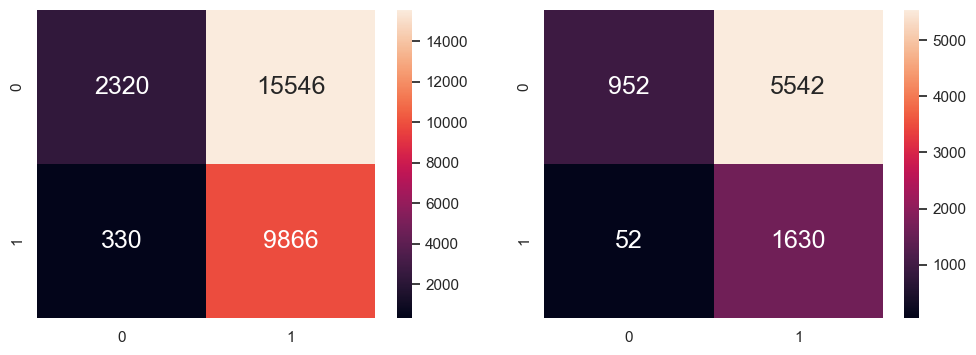

In [71]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Naive Bayes (Gaussian) Model

In [72]:
train_metric = {
    "Classification Model": "Gaussian Naive Bayes",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Gaussian Naive Bayes",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.4342527261064785
Precision 	: 0.3882417755391154
Recall 		: 0.9676343664182032
F1 Score 	: 0.5541451359245113

**Test Set Metrics**
Accuracy 	: 0.31580234833659493
Precision 	: 0.22727272727272727
Recall 		: 0.9690844233055886
F1 Score 	: 0.3681951660266546


### Comparing the Different Classification Models

In [75]:
train_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
train_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
4,Gaussian Naive Bayes,0.434253,0.388242,0.967634,0.554145
3,Support Vector Machine,0.796700,0.735996,0.686838,0.710568
0,Logistic Regression,0.798411,0.749697,0.668301,0.706663
2,K-nearest Neighbour,0.901112,0.879824,0.842978,0.861007
1,Decision Tree,0.993087,0.995050,0.985877,0.990442


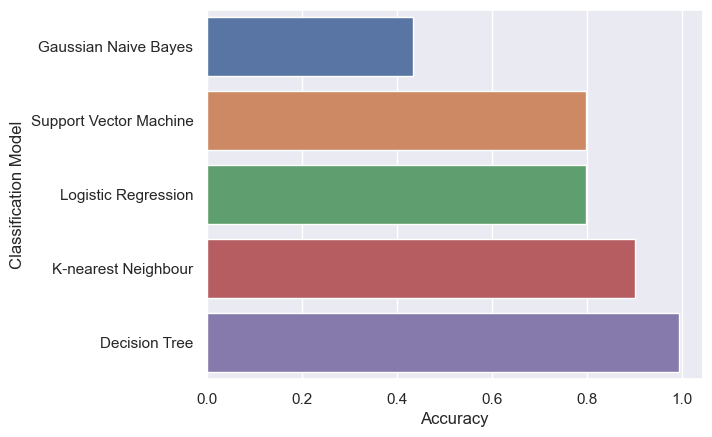

In [76]:
ax = sb.barplot(x="Accuracy", y="Classification Model", data=train_metrics)

In [79]:
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
4,Gaussian Naive Bayes,0.315802,0.227273,0.969084,0.368195
2,K-nearest Neighbour,0.768836,0.436353,0.423900,0.430036
1,Decision Tree,0.785103,0.474333,0.412010,0.440980
3,Support Vector Machine,0.812867,0.600529,0.269917,0.372436
0,Logistic Regression,0.816169,0.634586,0.250892,0.359608


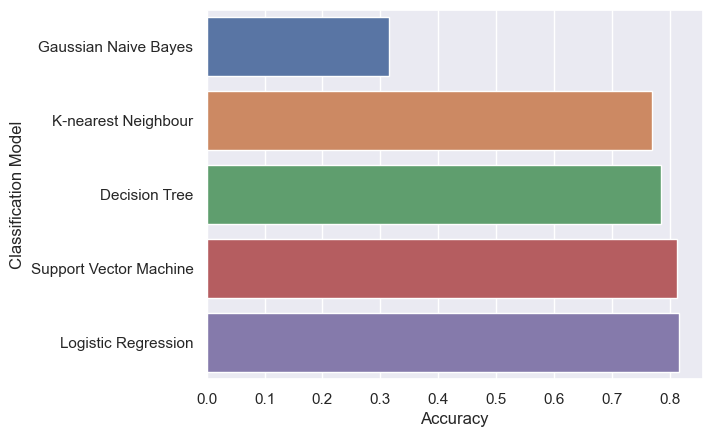

In [80]:
ax = sb.barplot(x="Accuracy", y="Classification Model", data=test_metrics)